In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

from modify_df import ic50_binary, split_df_by_cell_line, split_df_by_drugname

from create_model import defineSplits, create_all_models, make_logres_model, make_svc_model, make_gb_model

from sklearn.feature_selection import VarianceThreshold

In [3]:
df =  pd.read_csv("./data/datafile.csv")
df = ic50_binary(df)

train, test = split_df_by_drugname(df,0.8)

In [4]:
train_x = train.drop(['IC50_binary','Cell Line Name', 'Drug Name'],axis =1)
train_y = train['IC50_binary']

threshold = 1.0
splits = defineSplits(train_x,train_y)

constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(train_x)
constant_columns = [column for column in train_x.columns
                    if column not in train_x.columns[constant_filter.get_support()]]
X_test = constant_filter.transform(train_x)
# X_test = constant_filter.transform(X_test)
for column in constant_columns:
    print("Removed ", column)
    

train_x = train_x.drop(constant_columns, axis = 1)

Removed  cnaLUAD4


In [11]:
create_all_models(train_x,train_y,'IC50_binary',threshold,splits,train_x.columns.tolist(),max = 100)

KeyboardInterrupt: 

In [5]:
make_logres_model(train_x, train_y, threshold, splits, max=500)

/Users/shainawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shainawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shainawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shainawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shainawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


KeyboardInterrupt: 

In [10]:
make_gb_model(train_x, train_y, threshold, splits, max = 100)

RandomizedSearchCV(cv=[(array([    3,     4,     5, ..., 12366, 12367, 12368]),
                        array([    0,     1,     2, ..., 12354, 12361, 12369])),
                       (array([    0,     1,     2, ..., 12367, 12368, 12369]),
                        array([    4,     7,     9, ..., 12352, 12355, 12366])),
                       (array([    0,     1,     2, ..., 12367, 12368, 12369]),
                        array([    6,    15,    16, ..., 12362, 12363, 12365])),
                       (array([    0,     1,     2, ..., 12366, 12368, 12369]),
                        array([    3,     5,    10, ..., 12347, 12364, 12367])),
                       (array([    0,     1,     2, ..., 12...
                                        'gb__n_estimators': [5, 10, 25, 50,
                                                             100],
                                        'kbest__k': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 

In [22]:
import os
from utils import calculate_feature_importance
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
test_x = test.drop(['IC50_binary','Cell Line Name', 'Drug Name'],axis =1)
test_y = test['IC50_binary']

In [10]:
model_dir = './models_made/2023_9_6_03_39_22_randvar_123_cor_1.0_yvar_IC50_binary'

In [12]:
logres_score = calculate_feature_importance(test_x,test_y, model_dir+'/logres')
gb_score = calculate_feature_importance(test_x,test_y, model_dir+'/gb')
svc_score = calculate_feature_importance(test_x,test_y, model_dir+'/svc')

In [13]:
logres_score.rename(columns={'z-score': 'Logistic Regression'}, inplace=True)
gb_score.rename(columns={'z-score': 'Gradient Boosting'}, inplace=True)
svc_score.rename(columns={'z-score': 'Support Vector Machine'}, inplace=True)

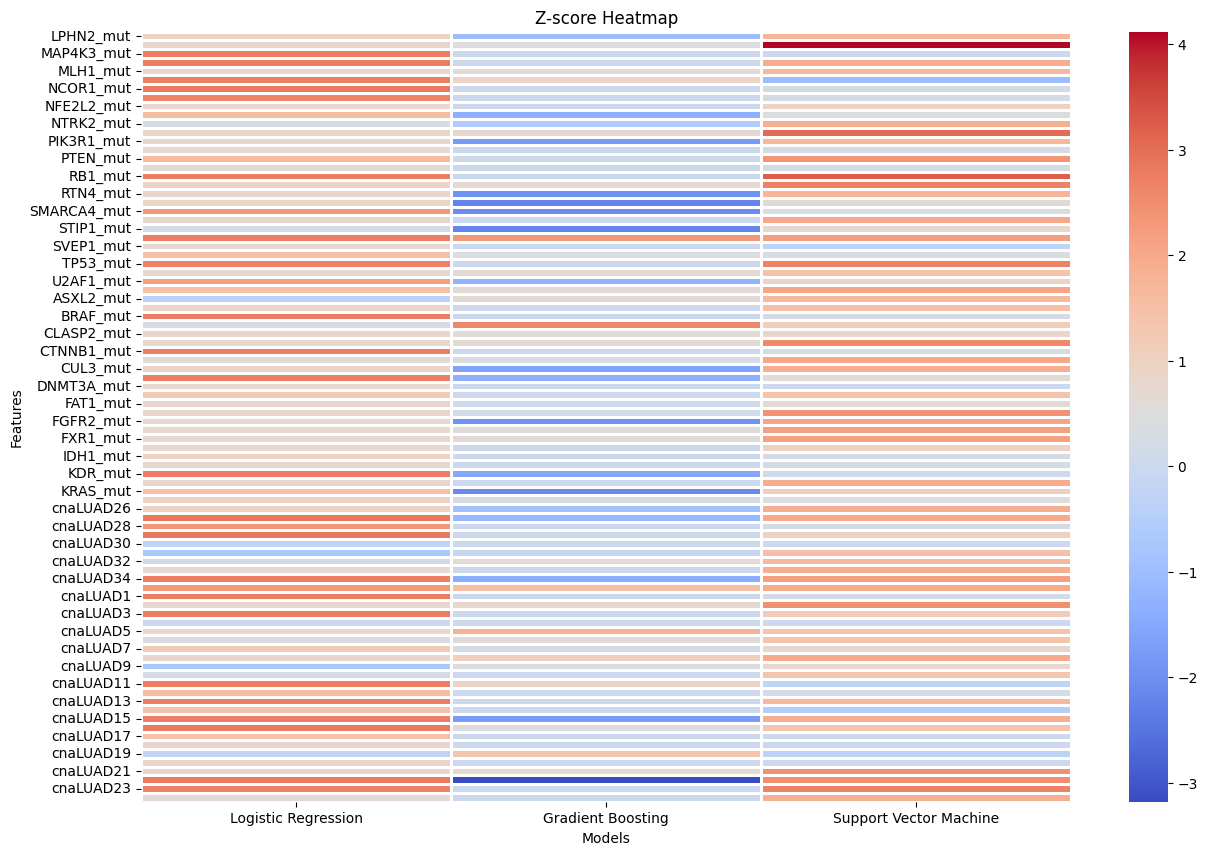

<Figure size 640x480 with 0 Axes>

In [23]:
all_score = pd.concat([logres_score,gb_score,svc_score], axis=1)

fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(all_score, cmap='coolwarm', annot=False, fmt=".3f", ax=ax,linewidths=1)


ax.set_xlabel("Models")
ax.set_ylabel("Features")
ax.set_title("Z-score Heatmap")

plt.show()

os.makedirs('./graphs/zscore',exist_ok=True)
